<a href="https://colab.research.google.com/github/313kris/Fraud-Detection-in-Financial-Transactions/blob/main/Yhillproject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [11]:
# Import necessary libraries
import pandas as pd

# Load the dataset from a public URL (GitHub or other sources)
url = 'https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [12]:
# Checking for missing values
print("Missing values:")
print(data.isnull().sum())


Missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [13]:
# Normalizing numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(['Class'], axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-1])
data_scaled['Class'] = data['Class']


In [14]:
# Handling imbalanced data using SMOTE
X = data_scaled.drop(['Class'], axis=1)
y = data_scaled['Class']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [16]:
# Efficient model evaluation
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Isolation Forest': IsolationForest(contamination=0.001)
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set (using a limited sample for faster evaluation)
    y_pred = model.predict(X_test[:1000])  # Use a subset for prediction to speed up

    # Display evaluation metrics
    print(f'\nModel: {name}')
    print(f'Accuracy: {accuracy_score(y_test[:1000], y_pred):.4f}')
    print(f'Precision: {precision_score(y_test[:1000], y_pred):.4f}')
    print(f'Recall: {recall_score(y_test[:1000], y_pred):.4f}')
    print(f'F1 Score: {f1_score(y_test[:1000], y_pred):.4f}')


Model: Random Forest
Accuracy: 0.9990
Precision: 0.9980
Recall: 1.0000
F1 Score: 0.9990

Model: XGBoost
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Model: Isolation Forest
Accuracy: 0.4990
Precision: 0.4990
Recall: 1.0000
F1 Score: 0.6658


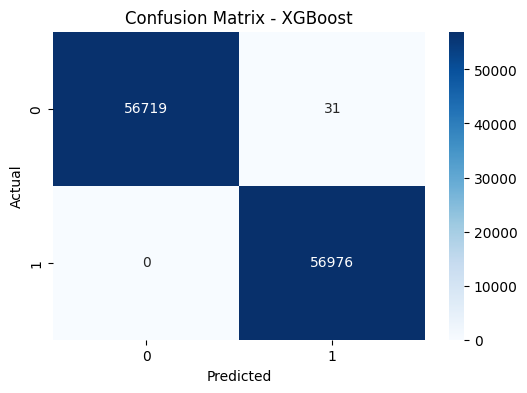

In [17]:
# Visualization: Confusion Matrix of XGBoost
xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
# Anomaly Detection with Isolation Forest
iso_forest = IsolationForest(contamination=0.001, random_state=42)
y_pred_iso = iso_forest.fit_predict(X)
print("Anomaly Detection - Isolation Forest")
print(f"Fraudulent transactions detected: {sum(y_pred_iso == -1)}")


Anomaly Detection - Isolation Forest
Fraudulent transactions detected: 285
